In [11]:
# 姓名:陳泓睿
# 學號:105600824

In [12]:
# 作業: 複迴歸
# 運用獲得的資料 -> AI -> 資料分析, 或是建立模型去協助人類預測或是回答問題
# AI: 機器學習 (ML, Machine Learning); 類神經網路 (NN, Neuro Network)
# ML: 單純線性迴歸 (Smiple Liner Regression) y = ax + b
# 多元線性迴歸: y = a1x1 + a2x2 + a3x3 +..... + b

In [13]:
# 波士頓房價
# CRIM 城鎮犯罪率; ZN 住宅用地超過 700 坪; INDUS 非商業用地比例; NOX; CHAS 河; RM 房間數; AGE: 房齡; DIS 就業中心距離, RAD, TAX, PTRATIO B
# LSTAT -> 房價

In [14]:
from sklearn import datasets  # data = datasets.load_boston().data
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [15]:
# 資料切割: 80% 模型的訓練; 20% 驗證模型的準確性
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2
)
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)

(404, 13)
(102, 13)
(404,)


In [16]:
# 建立一個多元線性迴歸的預測模型
from sklearn.linear_model import LinearRegression

regr_model = LinearRegression()
regr_model.fit(data_train, target_train)

LinearRegression()

In [17]:
# 模型的評估方法
pre = regr_model.predict(data_test)
print(pre.round(1))
print(target_test)

[22.2 19.5 20.6 12.8 20.1 12.4 16.5 25.1 13.5 18.2 12.2 35.4 28.4 25.9
 13.9 29.2 24.7 21.5 28.4 32.7 24.5 23.5  8.  21.7 19.7 43.4 14.3 32.5
 16.9 10.1 16.1 28.4 12.9 35.  40.  16.6 25.9 24.3 13.5 35.5 21.4  7.3
 28.4 25.1 24.5 23.1 39.8 18.9 17.4 21.5 17.1 24.5 25.9 31.5 32.3 18.2
 24.  21.6 22.5 20.6 21.7 18.  17.2 27.6 17.7 21.8 19.9 26.2 19.2 20.8
 23.4 33.7 19.7 36.9 20.  30.7 20.3 13.7 18.  25.  14.  37.2 19.2 35.4
 25.3 21.  20.4 21.1 15.4 14.6 31.9 21.4 33.5 27.8 17.8 24.  35.7 18.7
 19.4 32.3 22.4 17.1]
[50.  19.2 21.8 15.6 23.1 12.7 13.3 18.5 13.4 20.1 11.8 46.7 24.4 23.9
 14.3 23.6 23.8 19.3 23.3 28.2 21.7 20.3 11.9 22.  20.5 50.  14.5 31.5
 10.2  9.7 13.8 33.4 13.8 30.1 50.  18.6 23.2 23.1 11.3 33.4 21.2  5.
 22.8 25.  25.  21.7 50.  19.9 23.1 25.  18.1 29.6 24.8 50.  29.8 16.1
 23.4 21.2 19.6 21.5 19.7 14.5 17.2 22.  17.4 21.7 19.9 20.7 27.9 20.9
 23.  34.9 16.8 42.3 20.3 29.4 27.1 18.2 13.9 23.9 19.  44.  18.5 35.1
 29.6 19.3 21.1 18.7 11.7 13.1 29.  20.1 26.7 26.6 15.4 

In [18]:
# 模型評估方法 1：決定係數 (迴歸)
print(
    regr_model.score(data_train, target_train).round(3)
)  # 0 <> 1, 至少大於 0.7, 0.999
print(regr_model.score(data_test, target_test).round(3))  # Overfitting

0.744
0.718


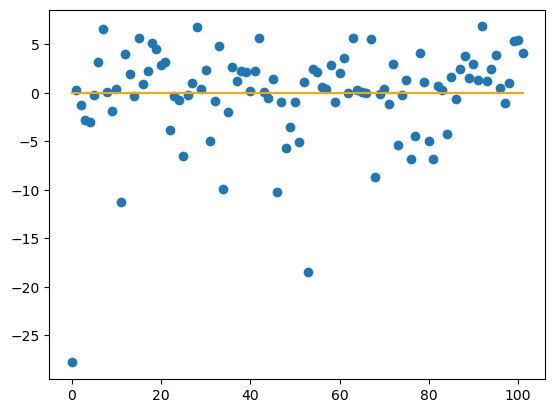

In [19]:
# 模型評估方法 2：圖形:殘差圖 (residual plot)
import matplotlib.pyplot as plt

x = np.arange(pre.size)
y = x * 0
plt.scatter(x, pre - target_test)
plt.plot(x, y, color="orange")  # 劃出 y= 0 的基礎線
plt.show()

In [20]:
# 模型評估方法 3：平均絕對誤差 (MAE, mean absolute error)
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(target_test, pre).round(2))

3.19
